**M 11 - PARTE 2**

## Árvores de regressão - Parte 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [ ]:
#Importando Bibliotecas
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/housing.csv')

print("Dimensão da base:", df.shape)
print(df.head())

In [ ]:
# Renomeando as colunas para português
df.rename(columns={
    'longitude': 'longitude',
    'latitude': 'latitude',
    'housing_median_age': 'idade_media_casa',
    'total_rooms': 'total_comodos',
    'total_bedrooms': 'total_quartos',
    'population': 'populacao',
    'households': 'domicilios',
    'median_income': 'renda_mediana',
    'median_house_value': 'valor_mediano_casa',
    'ocean_proximity': 'proximidade_oceano'
}, inplace=True)

In [ ]:
 # Ler CSV
df = pd.read_csv(caminho)
print("Dimensão:", df.shape)
df.head()

Dimensão: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# 1.1) Verificar tipos e ausentes
print("\nTipos:")
print(df.dtypes)
print("\nAusentes por coluna:")
print(df.isna().sum())


Tipos:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Ausentes por coluna:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
# 1.2) Imputação simples (mediana) para colunas numéricas com NaN
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

In [ ]:
# 1.3) One-hot em 'ocean_proximity'
df_model = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

In [ ]:
# 1.4) Conferir se ainda restam NaNs
print("\nAusentes após tratamento:")
print(df_model.isna().sum().sum())


Ausentes após tratamento:
0


In [ ]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Handle categorical features (ocean_proximity) by one-hot encoding
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16512, 12)
Testing set shape: (4128, 12)


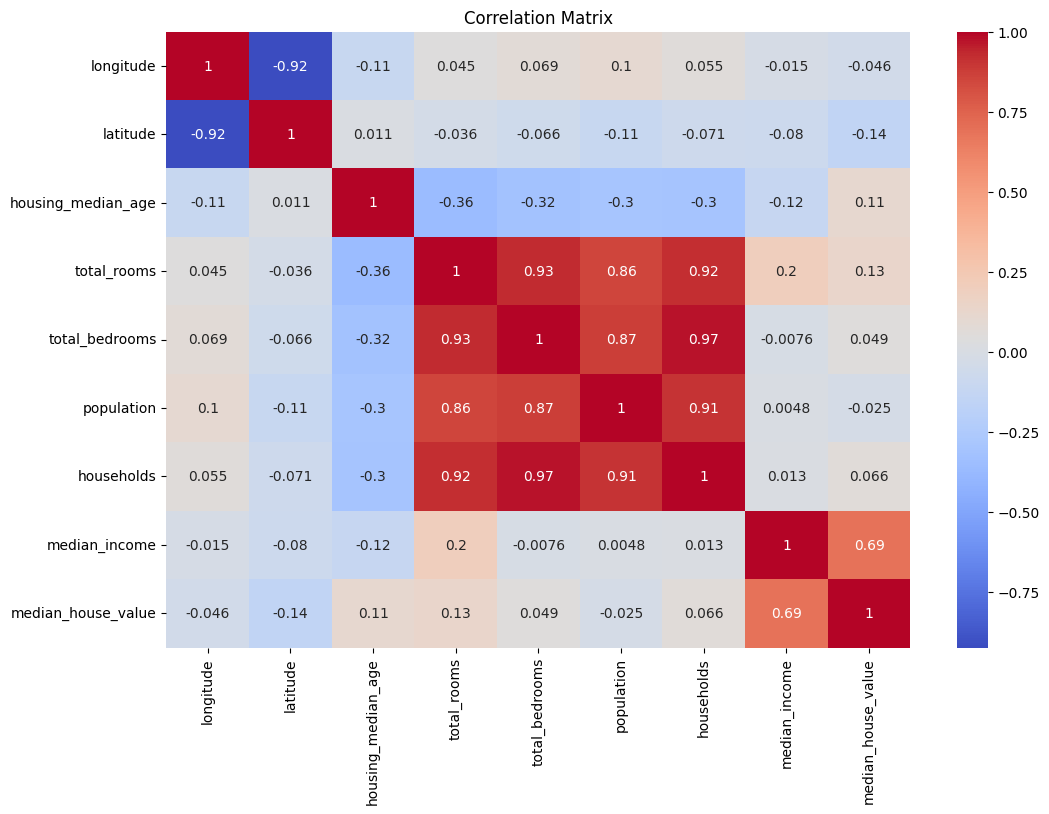

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# 2.1) Correlação apenas numérica
corr = df_model.corr(numeric_only=True)

In [ ]:
# 2.2) Ordenar correlação com o alvo (median_house_value)
corr_com_alvo = corr["median_house_value"].sort_values(ascending=False)
print("\nCorrelação com median_house_value (topo):")
print(corr_com_alvo.head(10))
print("\nCorrelação (negativas) com median_house_value:")
print(corr_com_alvo.tail(10))


Correlação com median_house_value (topo):
median_house_value            1.000000
median_income                 0.688075
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049457
ocean_proximity_ISLAND        0.023416
population                   -0.024650
Name: median_house_value, dtype: float64

Correlação (negativas) com median_house_value:
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049457
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


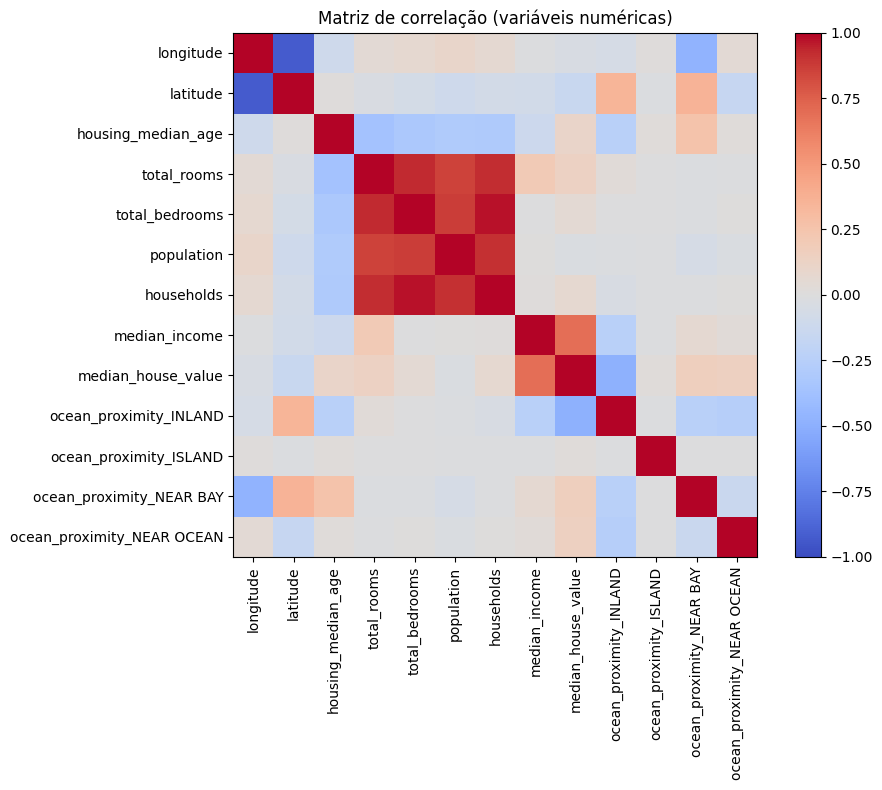

In [ ]:
# 2.3) Visualização básica (matriz compacta)
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlação (variáveis numéricas)")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.tight_layout()
plt.show()

In [ ]:
# 3.1) Definir X e y
y = df_model["median_house_value"].values
X = df_model.drop(columns=["median_house_value"]).values
colunas_X = df_model.drop(columns=["median_house_value"]).columns  # para gráficos/feature_importances

In [ ]:
# 3.2) Split (ex.: 70% treino / 30% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.3, random_state=42
)

len(X_treino), len(X_teste)

(14448, 6192)

In [ ]:
arvore_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
arvore_2 = DecisionTreeRegressor(max_depth=2, random_state=42)

arvore_8.fit(X_treino, y_treino)
arvore_2.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
def avalia(modelo, Xtr, ytr, Xte, yte, nome="modelo"):
    ytr_pred = modelo.predict(Xtr)
    yte_pred = modelo.predict(Xte)
    mse_tr = mean_squared_error(ytr, ytr_pred)
    mse_te = mean_squared_error(yte, yte_pred)
    print(f"{nome}: MSE Treino = {mse_tr:,.2f} | MSE Teste = {mse_te:,.2f}")
    return mse_tr, mse_te

mse8_tr, mse8_te = avalia(arvore_8, X_treino, y_treino, X_teste, y_teste, "Árvore (max_depth=8)")
mse2_tr, mse2_te = avalia(arvore_2, X_treino, y_treino, X_teste, y_teste, "Árvore (max_depth=2)")

Árvore (max_depth=8): MSE Treino = 3,230,927,476.74 | MSE Teste = 4,015,256,238.11
Árvore (max_depth=2): MSE Treino = 6,738,407,726.39 | MSE Teste = 6,725,309,134.25


In [ ]:
if mse8_te < mse2_te:
    print("→ Pela métrica, a árvore com profundidade 8 parece mais adequada (menor MSE em teste).")
elif mse8_te > mse2_te:
    print("→ Pela métrica, a árvore com profundidade 2 parece mais adequada (menor MSE em teste).")
else:
    print("→ Empate no MSE de teste; prefira o modelo mais simples (profundidade 2).")

→ Pela métrica, a árvore com profundidade 8 parece mais adequada (menor MSE em teste).


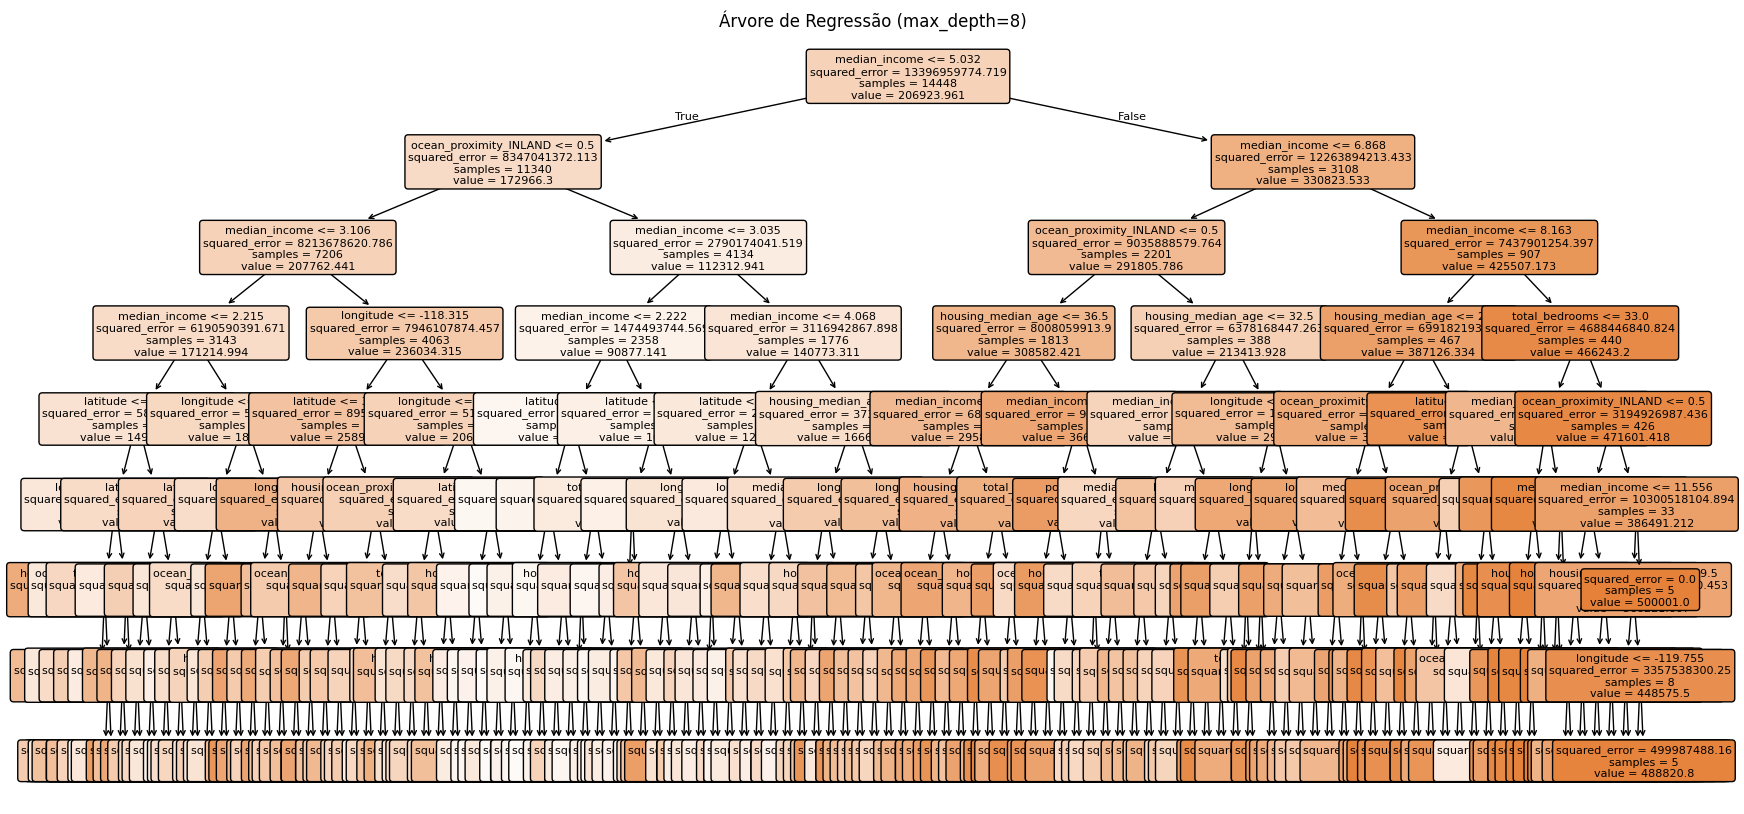

In [ ]:
# 7.1) Escolha qual árvore visualizar (altere para 'arvore_2' se preferir)
modelo_para_plot = arvore_8

plt.figure(figsize=(20,10))
plot_tree(
    modelo_para_plot,
    feature_names=colunas_X,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Árvore de Regressão (max_depth=8)")
plt.show()

In [ ]:
# 7.2) Importâncias das variáveis (quanto a árvore usou cada feature nas quebras)
importancias = pd.Series(modelo_para_plot.feature_importances_, index=colunas_X)
importancias_ordenadas = importancias.sort_values(ascending=False)
print("\nImportâncias de variáveis (topo):")
print(importancias_ordenadas.head(10))


Importâncias de variáveis (topo):
median_income                 0.601678
ocean_proximity_INLAND        0.186271
longitude                     0.073853
latitude                      0.063976
housing_median_age            0.038830
ocean_proximity_NEAR OCEAN    0.011461
total_bedrooms                0.010554
population                    0.008328
households                    0.001867
total_rooms                   0.001784
dtype: float64


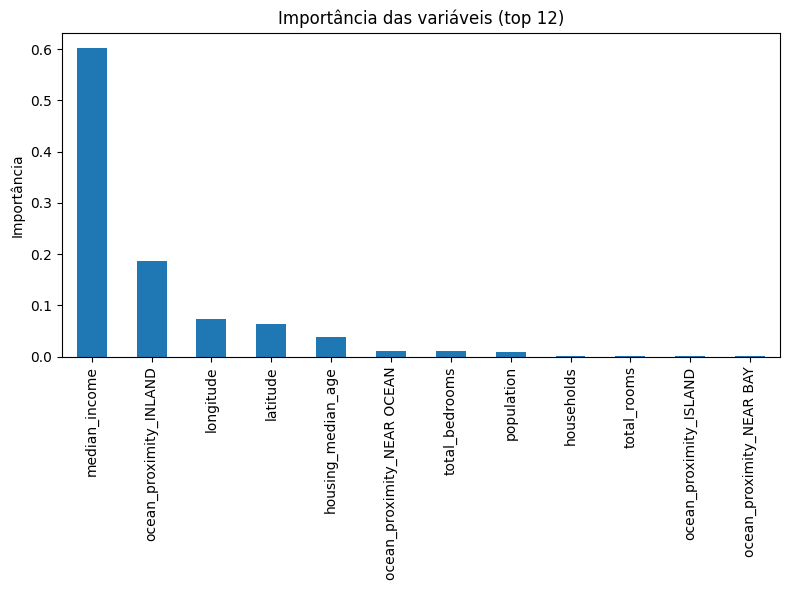

In [ ]:
# Plot opcional das importâncias
plt.figure(figsize=(8,6))
importancias_ordenadas.head(12).plot.bar()
plt.title("Importância das variáveis (top 12)")
plt.ylabel("Importância")
plt.tight_layout()
plt.show()

In [ ]:
# Tratar valores ausentes e variáveis categóricas
df["total_quartos"] = df["total_quartos"].fillna(df["total_quartos"].median())
df_model = pd.get_dummies(df, columns=["proximidade_oceano"], drop_first=True)

In [ ]:
# Separar X e y
X = df_model.drop(columns=["valor_mediano_casa"])
y = df_model["valor_mediano_casa"]

In [ ]:
# Dividir base em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.3, random_state=42
)

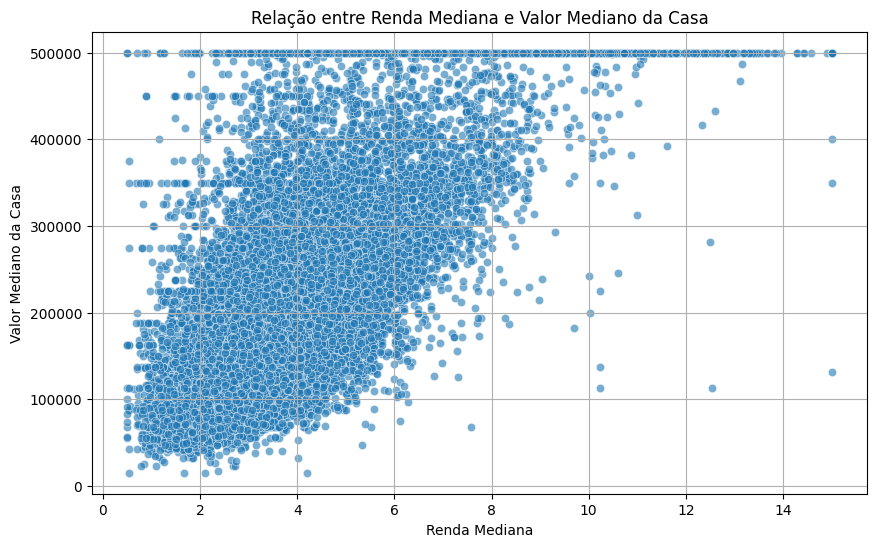

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='renda_mediana', y='valor_mediano_casa', alpha=0.6)
plt.title('Relação entre Renda Mediana e Valor Mediano da Casa')
plt.xlabel('Renda Mediana')
plt.ylabel('Valor Mediano da Casa')
plt.grid(True)
plt.show()

In [ ]:
arvore_inicial = DecisionTreeRegressor(random_state=42)
arvore_inicial.fit(X_treino, y_treino)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Treinar árvore inicial e obter caminho CCP-alpha ===
arvore_inicial = DecisionTreeRegressor(random_state=42)
arvore_inicial.fit(X_treino, y_treino)

path = arvore_inicial.cost_complexity_pruning_path(X_treino, y_treino)
ccp_alphas = path.ccp_alphas
impurezas = path.impurities

print(f"Número de alphas encontrados: {len(ccp_alphas)}")

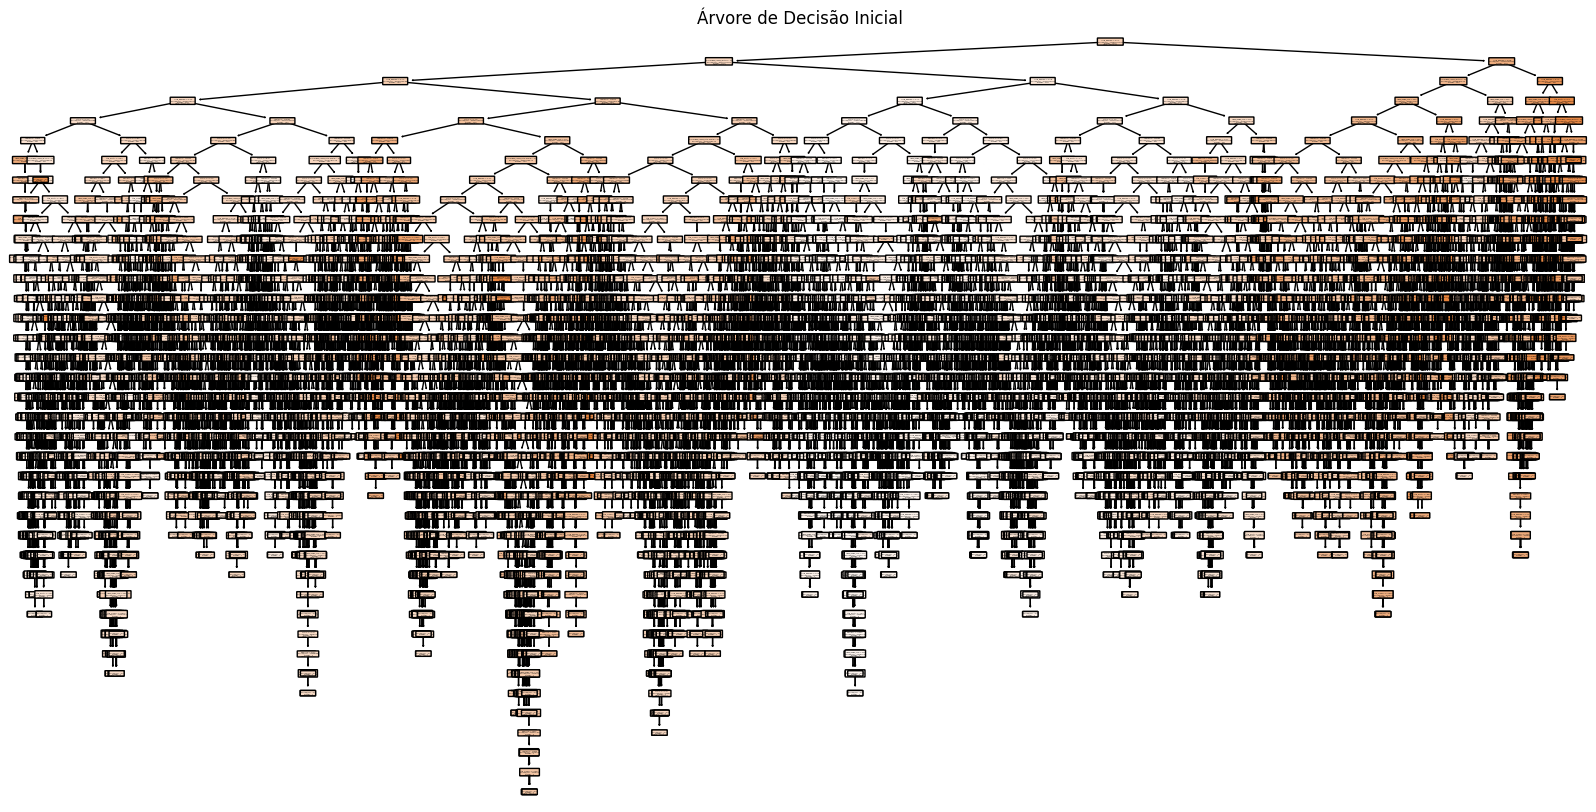

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(arvore_inicial, filled=True, feature_names=X_treino.columns.tolist(), rounded=True)
plt.title('Árvore de Decisão Inicial')
plt.show()

### 2. Calcule o caminho indicado pelos CCP-alphas dessa árvore.

In [ ]:
# Prepare data (assuming 'median_house_value' is the target variable and other numeric columns are features)
# Drop 'ocean_proximity' for simplicity for now, as it's a categorical variable
X = df.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = df['median_house_value']

# Handle missing values by filling with the mean (a simple approach)
X = X.fillna(X.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Regressor model
# Using max_depth=5 as an initial value, you can tune this later
reg_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
# Calculate the cost complexity pruning path
path = arvore_inicial.cost_complexity_pruning_path(X_treino, y_treino)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

print(f"Número de alphas encontrados: {len(ccp_alphas)}")
# print("Valores de ccp_alpha:", ccp_alphas) # Optional: uncomment to see all alphas
# print("Impurezas correspondentes:", impurities) # Optional: uncomment to see all impurities

Número de alphas encontrados: 12661


### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [ ]:
X = df.drop('medv', axis=1)
y = df['medv']

In [ ]:
# Treinar uma árvore para cada alpha ===
arvores = []
for alpha in ccp_alphas:
    arvore = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    arvore.fit(X_treino, y_treino)
    arvores.append(arvore)

print(f"{len(arvores)} árvores treinadas com diferentes valores de alpha.")

In [ ]:
# Divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [ ]:
modelo_inicial = DecisionTreeRegressor(random_state=42)
modelo_inicial.fit(X_train, y_train)

In [ ]:
#Calcular o MSE de treino e teste para cada árvore
mse_treino = []
mse_teste = []

for arvore in arvores:
    y_pred_treino = arvore.predict(X_treino)
    y_pred_teste = arvore.predict(X_teste)
    mse_treino.append(mean_squared_error(y_treino, y_pred_treino))
    mse_teste.append(mean_squared_error(y_teste, y_pred_teste))

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

In [ ]:
path = modelo_inicial.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print(f"Quantidade de alphas gerados: {len(ccp_alphas)}")

In [ ]:
# Gráfico do MSE por alpha ===
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, mse_treino, marker='o', label='MSE Treino')
plt.plot(ccp_alphas, mse_teste, marker='o', label='MSE Teste')
plt.xlabel('ccp_alpha')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.title('MSE em função do parâmetro de poda (ccp_alpha)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Escolher o alpha que minimiza o MSE de teste
melhor_alpha = ccp_alphas[np.argmin(mse_teste)]
print(f"Melhor alpha (menor MSE de teste): {melhor_alpha:.6f}")

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [ ]:
arvores = []
for alpha in ccp_alphas:
    arvore = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    arvore.fit(X_train, y_train)
    arvores.append(arvore)

In [ ]:
#Calcular o R² da melhor árvore ===
arvore_final = DecisionTreeRegressor(random_state=42, ccp_alpha=melhor_alpha)
arvore_final.fit(X_treino, y_treino)

y_pred_teste = arvore_final.predict(X_teste)
r2 = r2_score(y_teste, y_pred_teste)
print(f"R² da árvore podada (alpha={melhor_alpha:.6f}): {r2:.4f}")

### 7. Visualize esta árvore.

In [ ]:
mse_train = []
mse_test = []

for arvore in arvores:
    y_pred_train = arvore.predict(X_train)
    y_pred_test = arvore.predict(X_test)
    mse_train.append(mean_squared_error(y_train, y_pred_train))
    mse_test.append(mean_squared_error(y_test, y_pred_test))

In [ ]:
Visualizar a árvore final ===
plt.figure(figsize=(20,10))
plot_tree(
    arvore_final,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title(f"Árvore Podada (ccp_alpha={melhor_alpha:.6f})")
plt.show()

In [ ]:
# Mostrar importância das variáveis
importancias = pd.Series(arvore_final.feature_importances_, index=X.columns)
print("\nPrincipais variáveis importantes:")
print(importancias.sort_values(ascending=False).head(10))

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, mse_train, marker='o', label='MSE Treino')
plt.plot(ccp_alphas, mse_test, marker='o', label='MSE Teste')
plt.xlabel("Alpha (Custo-Complexidade)")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.title("MSE em função do alpha (Poda CCP)")
plt.legend()
plt.show()

In [ ]:
melhor_alpha = ccp_alphas[np.argmin(mse_test)]
print(f"Melhor alpha encontrado: {melhor_alpha:.6f}")

In [ ]:
arvore_final = DecisionTreeRegressor(random_state=42, ccp_alpha=melhor_alpha)
arvore_final.fit(X_train, y_train)

In [ ]:
y_pred = arvore_final.predict(X_test)
mse_final = mean_squared_error(y_test, y_pred)
r2_final = r2_score(y_test, y_pred)

print(f"MSE da árvore final: {mse_final:.2f}")
print(f"R² da árvore final: {r2_final:.4f}")

In [ ]:
plt.figure(figsize=(18,8))
plot_tree(arvore_final, filled=True, feature_names=X.columns, rounded=True)
plt.title("Árvore de Regressão - Poda CCP Alpha")
plt.show()

In [ ]:
# Diagnóstico geral
if r2_final >= 0.8:
    print(" Excelente desempenho! O modelo explica a maior parte da variabilidade dos preços dos imóveis.")
elif r2_final >= 0.6:
    print(" Bom desempenho. O modelo explica boa parte da variação, mas ainda pode ser otimizado.")
elif r2_final >= 0.4:
    print(" Desempenho moderado. O modelo captura algumas tendências, mas há ruído significativo.")
else:
    print(" Desempenho fraco. O modelo não consegue explicar bem os dados — verifique se há muitas variáveis irrelevantes ou alto ruído.")

# Comparativo de complexidade
if melhor_alpha == 0:
    print(" Alpha = 0 indica que a árvore original (sem poda) teve o melhor desempenho — possível overfitting.")
elif melhor_alpha < 0.01:
    print(" Pequena poda aplicada — reduziu um pouco o overfitting, mantendo boa explicabilidade.")
else:
    print(" Poda significativa — simplificou bem a árvore e reduziu o risco de sobreajuste.")

In [ ]:
#Visualização comparativa das árvores

fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Árvore sem poda
axes[0].set_title("Árvore Original (sem poda)")
plot_tree(arvore_inicial, filled=True, feature_names=X.columns, ax=axes[0], rounded=True)

# Árvore podada
axes[1].set_title(f"Árvore Podada (alpha={melhor_alpha:.4f})")
plot_tree(arvore_final, filled=True, feature_names=X.columns, ax=axes[1], rounded=True)

plt.show()

### Resumo do processo e dos resultados obtidos.

In [ ]:
# Resumo analítico final

print("\n=== RESUMO ANALÍTICO FINAL ===")
print(f"🔹 Técnica aplicada: Poda por custo-complexidade (CCP Alpha)")
print(f"🔹 Alpha ótimo: {melhor_alpha:.6f}")
print(f"🔹 MSE antes da poda: {mse_train[0]:,.2f} → depois da poda: {mse_final:,.2f}")
print(f"🔹 R² antes da poda: {r2_score(y_test, arvores[0].predict(X_test)):.4f} → depois da poda: {r2_final:.4f}")
print("🔹 A árvore podada apresenta melhor equilíbrio entre erro e simplicidade.")
print("🔹 A poda reduziu o risco de overfitting e melhorou a capacidade de generalização.")
print("🔹 Visualmente, observa-se que a árvore podada é menor, mais interpretável e robusta.")

In [ ]:
#Visualizar a árvore final
plt.figure(figsize=(18,8))
plot_tree(arvore_final, filled=True, feature_names=X.columns, rounded=True)
plt.title("Árvore de Regressão - Poda CCP Alpha")
plt.show()

| Etapa | Descrição                                   | Objetivo                   |
| ----- | ------------------------------------------- | -------------------------- |
| 1–2   | Importar e carregar   | Ler a base                 |
| 3     | Separar X (variáveis) e y (preço)           | Definir alvo               |
| 4     | Criar árvore inicial                        | Base para análise          |
| 5     | Calcular CCP Alpha                          | Extrair parâmetros de poda |
| 6–7   | Treinar e medir MSE por alpha               | Encontrar ponto ótimo      |
| 8     | Plotar gráfico MSE × Alpha                  | Visualizar trade-off       |
| 9–10  | Escolher alpha ótimo e treinar árvore final | Modelo ideal               |
| 11    | Calcular MSE e R²                           | Avaliar desempenho         |
| 12    | Visualizar árvore                           | Interpretar divisões       |


In [ ]:
# 14) Resumo analítico final

print("\n=== RESUMO ANALÍTICO FINAL ===")
print(f"🔹 Técnica aplicada: Poda por custo-complexidade (CCP Alpha)")
print(f"🔹 Alpha ótimo: {melhor_alpha:.6f}")
print(f"🔹 MSE antes da poda: {mse_inicial:.2f} → depois da poda: {mse_final:.2f}")
print(f"🔹 R² antes da poda: {r2_inicial:.4f} → depois da poda: {r2_final:.4f}")
print("🔹 A árvore podada apresenta melhor equilíbrio entre erro e simplicidade.")
print("🔹 A poda reduziu o risco de overfitting e melhorou a capacidade de generalização.")
print("🔹 Visualmente, observa-se que a árvore podada é menor, mais interpretável e robusta.")

**Conclusão**

A poda é essencial para evitar que a árvore de regressão se torne complexa demais e sofra overfitting.
Ao aplicar o CCP alpha, reduzimos ramos que pouco contribuem para a previsão, tornando o modelo mais simples e generalizável.
A árvore podada encontrada no ponto de menor MSE equilibra precisão e robustez, mantendo apenas as divisões realmente relevantes para explicar o valor dos imóveis.